# Console Saas data V2 Jupyter notebook

    this notebook is for visualizing trends, calculating activity rates within different user_id 
    and clients combinations ,and finally generating new datasets with the obtained activity rate results.
    
**note**:
    
    in this notebook we use saas data V2.

## 1. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import os
%matplotlib inline 
import matplotlib.pyplot as plt

import datetime as dt


## 2. Load Saas Events Data

In [2]:
from config import *
#raw_saas_path  
#raw_saas_V2
#raw_evts_V2
#print(raw_saas_path) for testing
#proc_saas_path  
#RabbitMQ paths
#raw_evts_path  
#proc_evts_path  

#function for loading data
def load_data(csv_path):
    return pd.read_csv(csv_path,\
                    parse_dates=['timestamp'] ,index_col=['timestamp'])#comment if timestamp indexing not wanted

sas_data = load_data(raw_saas_v2)

sas_data.rename(columns={'clients_codes.0': 'cl_0', 'clients_codes.1': 'cl_1',
                         'clients_codes.2': 'cl_2','clients_codes.3': 'cl_3',
                         'clients_codes.4': 'cl_4','clients_codes.5': 'cl_5',
                         'clients_codes.6': 'cl_6','clients_codes.7': 'cl_7',
                         'clients_codes.8': 'cl_8','clients_codes.9': 'cl_9',
                         'clients_codes.10': 'cl_10','clients_codes.11': 'cl_11',
                         'clients_codes.12': 'cl_12','clients_codes.13': 'cl_13',
                         'clients_codes.14': 'cl_14','clients_codes.15': 'cl_15',
                         'clients_codes.16': 'cl_16','clients_codes.17': 'cl_17',
                         'clients_codes.18': 'cl_18','clients_codes.19': 'cl_19',
                        }, inplace=True)

C:\Users\Syrine.benaziza\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3254: DtypeWarning: Columns (7,8,9,10,11) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [3]:
sas_data.head()

,_id,event_type,user_id,user_type,cl_0,cl_1,cl_2,cl_3,cl_4,cl_5,...,profiles.9.application_code,profiles.10.role_code,profiles.10.application_code,profiles.11.role_code,profiles.11.application_code,profiles.12.role_code,profiles.12.application_code,profiles.13.role_code,profiles.13.application_code,_class
timestamp,,,,,,,,,,,,,,,,,,,,,
2019-05-17 07:05:34.725000+00:00,5e7b882dd21b7c58687083a4,USER_CREATED,423146,STANDARD,1360,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,com.bl.consolesaas.interop.traces.domain.Messa...
2019-05-17 07:05:42.191000+00:00,5e7b882dd21b7c58687083a5,PROFILE_CREATED,423146,STANDARD,1360,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,com.bl.consolesaas.interop.traces.domain.Messa...
2019-05-17 07:06:29.054000+00:00,5e7b882dd21b7c58687083a6,USER_CREATED,423148,STANDARD,1360,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,com.bl.consolesaas.interop.traces.domain.Messa...
2019-05-17 07:06:36.717000+00:00,5e7b882dd21b7c58687083a7,PROFILE_CREATED,423148,STANDARD,1360,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,com.bl.consolesaas.interop.traces.domain.Messa...
2019-05-17 07:06:47.609000+00:00,5e7b882dd21b7c58687083a8,USER_UPDATED,423146,STANDARD,1360,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,com.bl.consolesaas.interop.traces.domain.Messa...


In [4]:
sas_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187683 entries, 2019-05-17 07:05:34.725000+00:00 to 2020-06-26 12:36:20.058000+00:00
Data columns (total 53 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   _id                           187683 non-null  object 
 1   event_type                    187683 non-null  object 
 2   user_id                       187683 non-null  int64  
 3   user_type                     187683 non-null  object 
 4   cl_0                          187683 non-null  object 
 5   cl_1                          30104 non-null   object 
 6   cl_2                          22859 non-null   object 
 7   cl_3                          19558 non-null   object 
 8   cl_4                          18484 non-null   object 
 9   cl_5                          13625 non-null   object 
 10  cl_6                          12150 non-null   object 
 11  cl_7                          11913 non-null

In [5]:
sas_data.isna().sum()

_id                                  0
event_type                           0
user_id                              0
user_type                            0
cl_0                                 0
cl_1                            157579
cl_2                            164824
cl_3                            168125
cl_4                            169199
cl_5                            174058
cl_6                            175533
cl_7                            175770
cl_8                            175968
cl_9                            175995
cl_10                           176413
cl_11                           176423
cl_12                           176632
cl_13                           176636
cl_14                           177528
cl_15                           177976
cl_16                           177982
cl_17                           183867
cl_18                           183875
cl_19                           183901
profiles.0.role_code              9595
profiles.0.application_co

In [6]:
print('SAAS total size ')
print(sas_data.shape)
print('')
print('SAAS  columns')
print(sas_data.columns)

SAAS total size 
(187683, 53)

SAAS  columns
Index(['_id', 'event_type', 'user_id', 'user_type', 'cl_0', 'cl_1', 'cl_2',
       'cl_3', 'cl_4', 'cl_5', 'cl_6', 'cl_7', 'cl_8', 'cl_9', 'cl_10',
       'cl_11', 'cl_12', 'cl_13', 'cl_14', 'cl_15', 'cl_16', 'cl_17', 'cl_18',
       'cl_19', 'profiles.0.role_code', 'profiles.0.application_code',
       'profiles.1.role_code', 'profiles.1.application_code',
       'profiles.2.role_code', 'profiles.2.application_code',
       'profiles.3.role_code', 'profiles.3.application_code',
       'profiles.4.role_code', 'profiles.4.application_code',
       'profiles.5.role_code', 'profiles.5.application_code',
       'profiles.6.role_code', 'profiles.6.application_code',
       'profiles.7.role_code', 'profiles.7.application_code',
       'profiles.8.role_code', 'profiles.8.application_code',
       'profiles.9.role_code', 'profiles.9.application_code',
       'profiles.10.role_code', 'profiles.10.application_code',
       'profiles.11.role_code', 'pr

In [7]:
print('SAAS Data starting date ')
print(sas_data.index.min())
print('')
print('SAAS Data Ending date')
print(sas_data.index.max())

SAAS Data starting date 
2019-05-17 07:05:34.725000+00:00

SAAS Data Ending date
2020-06-26 12:36:20.058000+00:00


## 3. Compose temporal features from Data

In [8]:
df=sas_data.drop_duplicates( keep='last')
#df = df.tz_localize(None) # removing the timezone information resulting in naive local time
#df.reset_index(drop=False ,inplace=True)
#df['date']=df['timestamp']
df['year'] = df.index.year
df['week'] = df.index.week
 
df['month'] = df.index.month
df['day'] = df.index.day
df['hour'] = df.index.hour
df['minutes'] = df.index.minute
df['seconds'] = df.index.second

df['count'] = 0


In [9]:
df

,_id,event_type,user_id,user_type,cl_0,cl_1,cl_2,cl_3,cl_4,cl_5,...,profiles.13.application_code,_class,year,week,month,day,hour,minutes,seconds,count
timestamp,,,,,,,,,,,,,,,,,,,,,
2019-05-17 07:05:34.725000+00:00,5e7b882dd21b7c58687083a4,USER_CREATED,423146,STANDARD,1360,NaN,NaN,NaN,NaN,NaN,...,NaN,com.bl.consolesaas.interop.traces.domain.Messa...,2019,20,5,17,7,5,34,0
2019-05-17 07:05:42.191000+00:00,5e7b882dd21b7c58687083a5,PROFILE_CREATED,423146,STANDARD,1360,NaN,NaN,NaN,NaN,NaN,...,NaN,com.bl.consolesaas.interop.traces.domain.Messa...,2019,20,5,17,7,5,42,0
2019-05-17 07:06:29.054000+00:00,5e7b882dd21b7c58687083a6,USER_CREATED,423148,STANDARD,1360,NaN,NaN,NaN,NaN,NaN,...,NaN,com.bl.consolesaas.interop.traces.domain.Messa...,2019,20,5,17,7,6,29,0
2019-05-17 07:06:36.717000+00:00,5e7b882dd21b7c58687083a7,PROFILE_CREATED,423148,STANDARD,1360,NaN,NaN,NaN,NaN,NaN,...,NaN,com.bl.consolesaas.interop.traces.domain.Messa...,2019,20,5,17,7,6,36,0
2019-05-17 07:06:47.609000+00:00,5e7b882dd21b7c58687083a8,USER_UPDATED,423146,STANDARD,1360,NaN,NaN,NaN,NaN,NaN,...,NaN,com.bl.consolesaas.interop.traces.domain.Messa...,2019,20,5,17,7,6,47,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-26 12:34:05.507000+00:00,5ef6088ba3c7003944ba95ba,PROFILE_UPDATED,461091,STANDARD,11754,NaN,NaN,NaN,NaN,NaN,...,NaN,com.bl.consolesaas.interop.traces.domain.Messa...,2020,26,6,26,12,34,5,0
2020-06-26 12:34:14.820000+00:00,5ef6088ba3c7003944ba95bb,USER_UPDATED,461093,STANDARD,11754,NaN,NaN,NaN,NaN,NaN,...,NaN,com.bl.consolesaas.interop.traces.domain.Messa...,2020,26,6,26,12,34,14,0
2020-06-26 12:34:14.899000+00:00,5ef6088ba3c7003944ba95bc,PROFILE_UPDATED,461093,STANDARD,11754,NaN,NaN,NaN,NaN,NaN,...,NaN,com.bl.consolesaas.interop.traces.domain.Messa...,2020,26,6,26,12,34,14,0


## Encode Events for better processing

In [10]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
df['evt_code'] = LE.fit_transform(df['event_type'])

LE.classes_

array(['PROFILE_CREATED', 'PROFILE_DELETED', 'PROFILE_UPDATED',
       'USER_CREATED', 'USER_DELETED', 'USER_UPDATED'], dtype=object)

## Visualize histograms

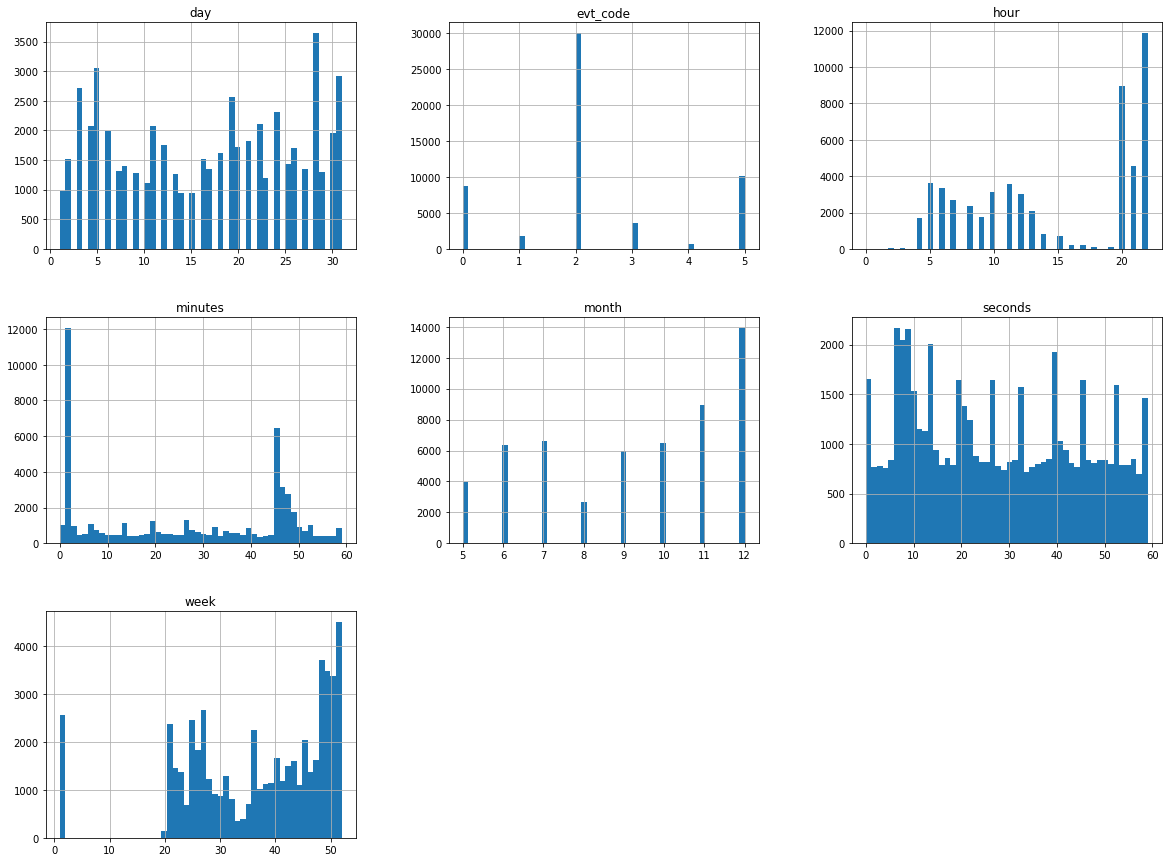

In [11]:
rec_2019 = df.loc['2019-01-01':'2019-12-31']
rec_2019 = rec_2019[['week','month' ,'day' ,'hour' ,'minutes' ,'seconds','evt_code']]
#rec_2019 = rec_2019.drop(['year' ] ,axis=1)
rec_2019.hist(bins=50, figsize=(20,15))
plt.show()

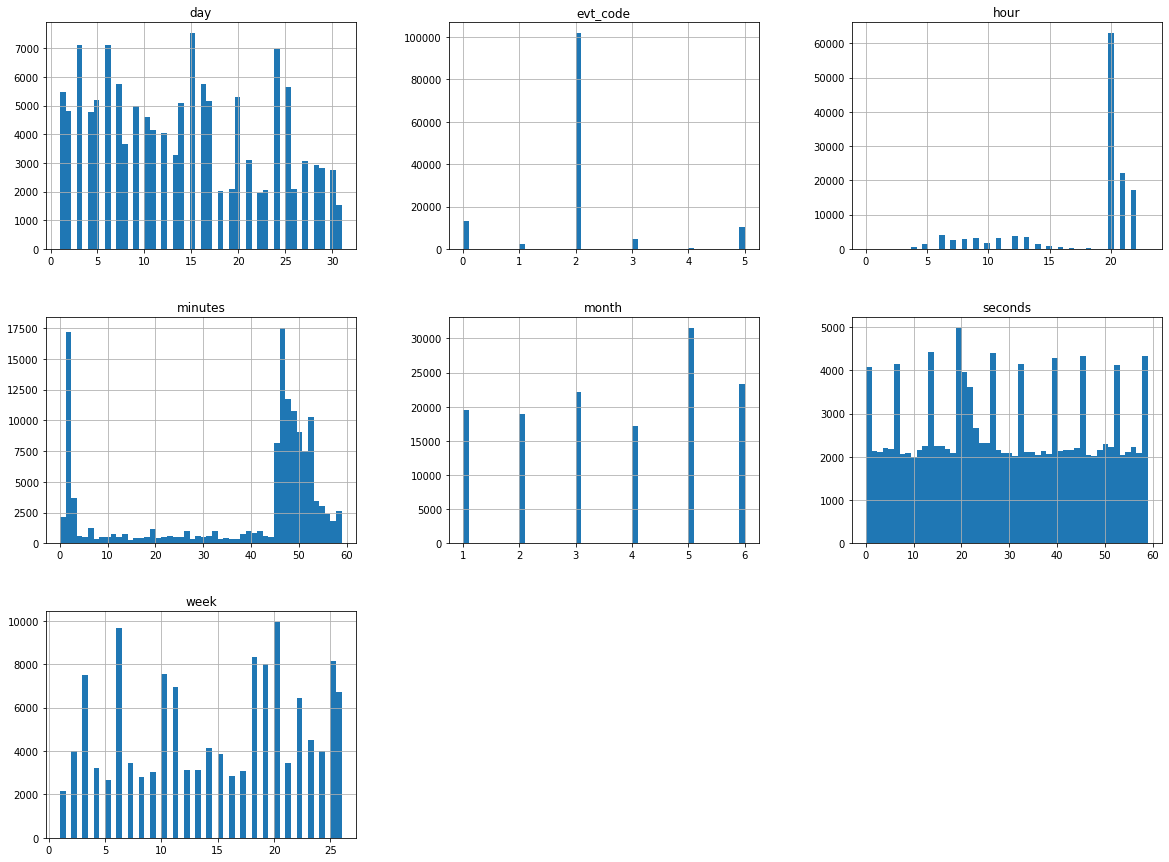

In [12]:
rec_2020 = df.loc['2020-01-01':'2020-06-30']
rec_2020 = rec_2020[['week','month' ,'day' ,'hour' ,'minutes' ,'seconds','evt_code']]

rec_2020.hist(bins=50, figsize=(20,15))
plt.show()

## 4. Some study of data statistical properties

### Function 1 using the 3*std  approach for outlier  detection

In [13]:
import numpy as np
# Function to Detection Outlier on one-dimentional datasets.
def find_anomalies(random_data):
    random_data_std = np.std(random_data)
    random_data_mean = np.mean(random_data)
    print('DATA MEAN :')
    print(random_data_mean)
    print('  STD : ')
    print( random_data_std)
    
    # Set upper and lower limit to 3 standard deviation
    anomaly_cut_off = random_data_std * 3
    print("")
    print(' Anomaly_cut_off value (aka std * 3 value) ')
    print(anomaly_cut_off)
    lower_limit  = random_data_mean - anomaly_cut_off 
    upper_limit = random_data_mean + anomaly_cut_off
    print("")
    print("   LIMIT VALUES  :")
    print('upper_limit value')
    print(upper_limit)
    print('lower_limit value')
    print(lower_limit)
    
    # Find outliers
    anomalies = []
    for outlier in random_data:
        if outlier > upper_limit or outlier < lower_limit:
            anomalies.append(outlier)
    return upper_limit,anomalies

### using the Mean Absolute Deviation for outlier detection

     the presence of outliers is likely to have a strong effect on the mean and the standard deviation, making this technique unreliable. 
 
    This occurs because the statistics of centre and distance—the mean and standard deviation, respectively—that we're using to spot outliers… are themselves strongly affected by outliers. The crux of the problem is that the standard deviation is based on squared distances, so extreme points are much more influential than those close to the mean.

    therefore, using a measure of distance that's robust against outliers. 
    
    A good candidate for this job is *the median absolute deviation from median* ,commonly shortened to the median 
    absolute deviation (MAD). It is the median of the set comprising the absolute values of the differences between the median and each data point. 

    One of the commonest ways of finding outliers in one-dimensional data is to mark as a potential outlier any 
    point that is more than two standard deviations, say, from the mean (I am referring to sample means and
    standard deviations here and in what follows).
    But the presence of outliers is likely to have a strong effect on the mean and the standard deviation, making 
    this technique unreliable.

In [14]:
def mad_Median(points, thresh=3.5):
    """"References:
    ----------
        Boris Iglewicz and David Hoaglin (1993), "Volume 16: How to Detect and
        Handle Outliers", The ASQC Basic References in Quality Control:
        Statistical Techniques, Edward F. Mykytka, Ph.D., Editor. 
    """
    if len(points.shape) == 1:
        points = points[:,None]
    median = np.median(points, axis=0)
    
    diff = np.sum( ( points - median)**2 , axis=-1)
    diff = np.sqrt(diff)
    
    med_abs_deviation = np.median(diff)
    
    print("med_abs_deviation")
    print(med_abs_deviation)
    modified_z_score = 0.6745 * diff / med_abs_deviation
    #0.6745 is the 0.75th quartile of the standard normal distribution, to which the MAD converges to.
    
    print('modified_z_score')
    print(modified_z_score)
    print("")
    
    return modified_z_score > thresh

## 2019 Activity rate (Hourly Rate)

In [15]:
groupped_data_19 = df['2019'].groupby(['year','month','day','hour','user_id','event_type']).agg({'count': 'size'})
#groupped_data_19["%"] = groupped_data_19.apply(lambda x:  100*x / x.sum())
print('COUNT MAX :')
m = (groupped_data_19.max()).iloc[0]
print(m)
print("")
print(" 2019 Groupped Data")
print(groupped_data_19)






COUNT MAX :
224

 2019 Groupped Data
                                             count
year month day hour user_id event_type            
2019 5     17  7    289437  USER_UPDATED         1
                    409571  USER_UPDATED         1
                    410441  USER_UPDATED         1
                    423141  USER_UPDATED         2
                    423144  USER_UPDATED         2
...                                            ...
     12    31  22   452020  PROFILE_UPDATED      1
                    452044  PROFILE_UPDATED      1
                    452075  PROFILE_UPDATED      1
                    452077  PROFILE_UPDATED      1
                    452127  PROFILE_UPDATED      6

[29704 rows x 1 columns]


In [16]:

print("-------------USING THE STANDARD DEVIATION-------------------")
upper_limit , anom = find_anomalies(groupped_data_19['count'])
print("---------------------------------------------")

print("")
print('events outside of the [ mean()+-3*STD ] during an hour of a given day ')
print(groupped_data_19[ groupped_data_19['count'] > upper_limit ])
print("---------------------------------------------")

print("")
print("-------------USING THE MAD-------------------")
arr = mad_Median((groupped_data_19['count']))

print("")
print('events outside of the MAD during an hour of a given day ')
print(groupped_data_19[ arr ])

-------------USING THE STANDARD DEVIATION-------------------
DATA MEAN :
1.8489429033126852
  STD : 
4.0276248097474445

 Anomaly_cut_off value (aka std * 3 value) 
12.082874429242334

   LIMIT VALUES  :
upper_limit value
13.93181733255502
lower_limit value
-10.233931525929648
---------------------------------------------

events outside of the [ mean()+-3*STD ] during an hour of a given day 
                                             count
year month day hour user_id event_type            
2019 5     21  6    423314  PROFILE_CREATED     14
                    423329  PROFILE_CREATED     14
                    423344  PROFILE_CREATED     14
               7    423370  PROFILE_CREATED     14
                    423385  PROFILE_CREATED     14
...                                            ...
     12    30  21   447586  PROFILE_UPDATED     26
           31  21   444344  PROFILE_UPDATED     14
                    446773  PROFILE_UPDATED     18
                    447586  PROFILE_UPDATED

C:\Users\Syrine.benaziza\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\Syrine.benaziza\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide
C:\Users\Syrine.benaziza\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater


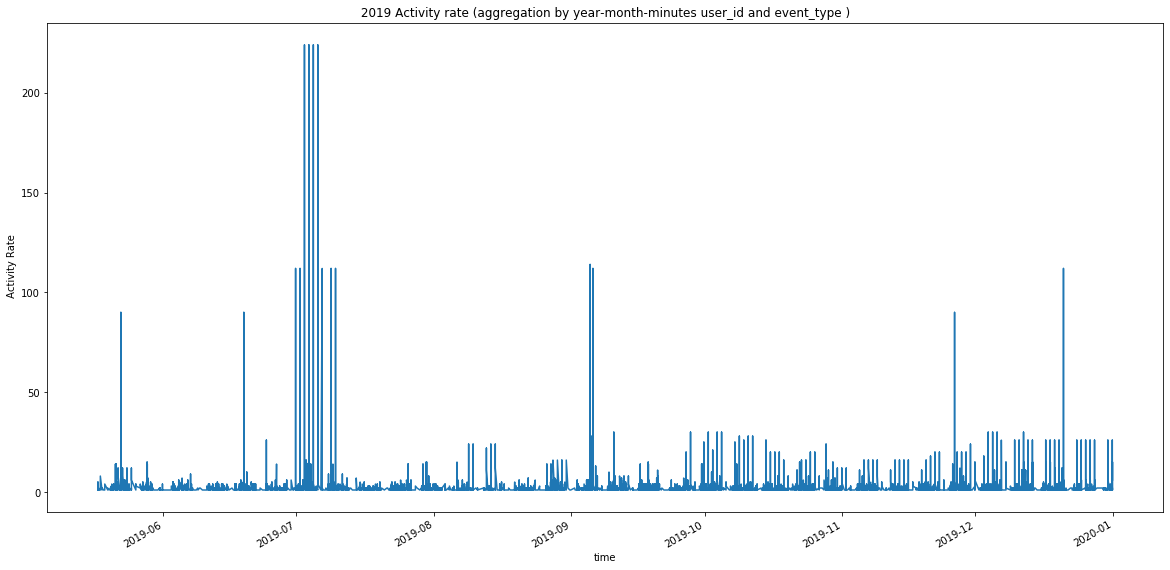

In [17]:

groupped_data_19.reset_index(drop=False ,inplace= True)
dm = groupped_data_19.copy()
dm.index = dm.apply(lambda x: dt.datetime(x['year'] , x['month'], x['day'], x['hour']), axis=1)
dm['count'].plot(#kind='line',
             figsize=(20, 10), # pass a tuple (x, y) size
             )

plt.title(' 2019 Activity rate (aggregation by year-month-minutes user_id and event_type ) ')
plt.ylabel(' Activity Rate')
plt.xlabel('time')

plt.show() 

## 2020 Activity rate (Hourly Rate)

COUNT MAX :
476

 2020 Groupped Data
                                             count
year month day hour user_id event_type            
2020 1     1   21   176212  PROFILE_UPDATED      1
                    176911  PROFILE_UPDATED      1
                    177988  PROFILE_UPDATED      1
                    178131  PROFILE_UPDATED      1
                    179157  PROFILE_UPDATED      1
...                                            ...
     6     26  12   461093  USER_UPDATED         1
                    461095  PROFILE_CREATED      1
                            PROFILE_UPDATED      3
                            USER_CREATED         1
                            USER_UPDATED         4

[43021 rows x 1 columns]
---------------------------------------------
DATA MEAN :
3.0859812649636225
  STD : 
9.223922713359482

 Anomaly_cut_off value (aka std * 3 value) 
27.671768140078445

   LIMIT VALUES  :
upper_limit value
30.757749405042066
lower_limit value
-24.585786875114824
-----------

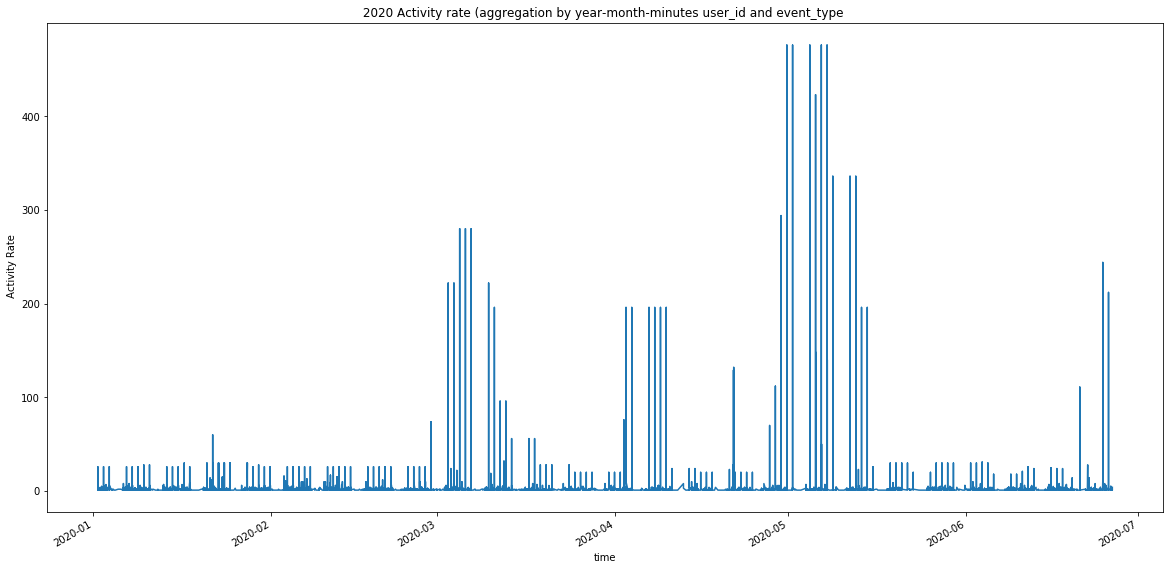

In [18]:
groupped_data_20 = df['2020'].groupby(['year','month','day',\
                                       'hour','user_id','event_type']).agg({'count': 'size'})
#groupped_data_20["%"] = groupped_data_20.apply(lambda x:  100*x / x.sum())
print('COUNT MAX :')
m = (groupped_data_20.max()).iloc[0]
print(m)
print("")
print(" 2020 Groupped Data")
print(groupped_data_20)

print("---------------------------------------------")
upper_limit , anom = find_anomalies(groupped_data_20['count'])
print("---------------------------------------------")

print("")
print('events outside of the upper limit during an hour of a given day ')
print(groupped_data_20[ groupped_data_20['count'] > upper_limit ])


groupped_data_20.reset_index(drop=False ,inplace= True)
dm = groupped_data_20.copy()
dm.index = dm.apply(lambda x: dt.datetime(x['year'] , x['month'], x['day'], x['hour']), axis=1)
dm['count'].plot(#kind='line',
             figsize=(20, 10), # pass a tuple (x, y) size
             )

plt.title(' 2020 Activity rate (aggregation by year-month-minutes user_id and event_type  ')
plt.ylabel(' Activity Rate')
plt.xlabel('time')

plt.show() 

# All activity analysis 

## All activity analysis (minutes rate)

In [19]:
groupped_data = df.groupby(['year','month','day',\
                            'hour','minutes','user_id',\
                            'event_type']).agg({'count': 'size'})

print('COUNT MAX :')
m=(groupped_data.max()).iloc[0]
print(m)

print("")
print("Maximum Activity details: ")
max_act = groupped_data[groupped_data["count"]== m]
print(max_act)

print("")
print("user_id with maximum activity count ")
max_act.reset_index(drop=False, inplace=True)
user_id = max_act['user_id'].iloc[0]
print(user_id)


groupped_data

COUNT MAX :
140

Maximum Activity details: 
                                                     count
year month day hour minutes user_id event_type            
2020 5     7   21   0       409945  PROFILE_UPDATED    140

user_id with maximum activity count 
409945


count
year month day hour minutes user_id event_type            
2019 5     17  7    5       423146  PROFILE_CREATED      1
                                    USER_CREATED         1
                    6       423146  USER_UPDATED         1
                            423148  PROFILE_CREATED      1
                                    USER_CREATED         1
...                                                    ...
2020 6     26  12   34      461091  USER_UPDATED         1
                            461093  PROFILE_UPDATED      1
                                    USER_UPDATED         1
                    36      461095  PROFILE_UPDATED      1
                                    USER_UPDATED         1

[81445 rows x 1 columns]

---------------------------------------------------


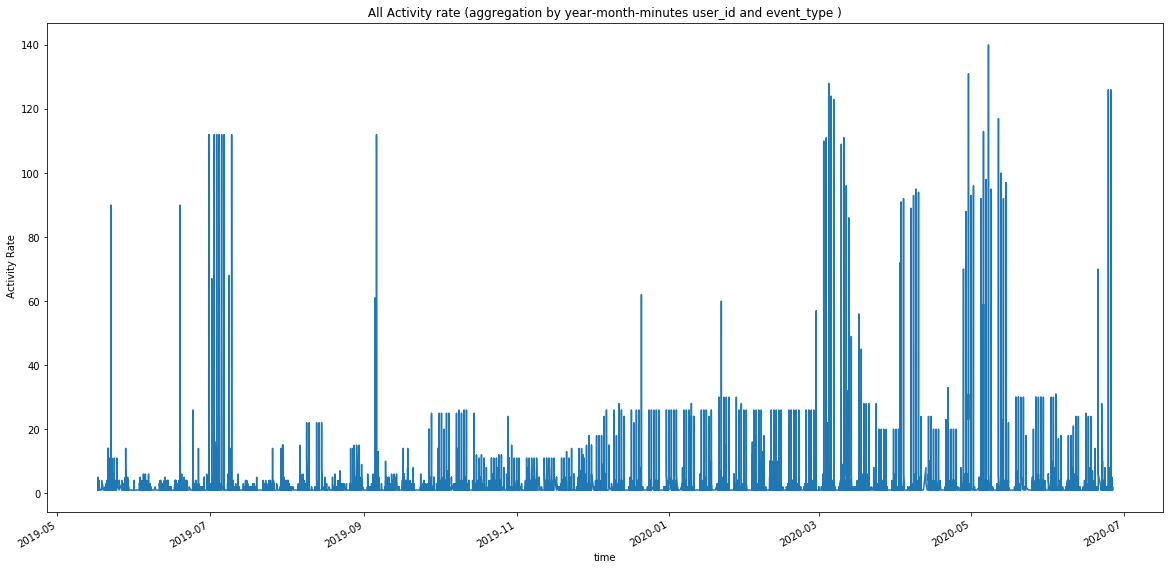

In [20]:
print("---------------------------------------------------")

groupped_data.reset_index(drop=False ,inplace= True)
dm = groupped_data.copy()
dm.index = dm.apply(lambda x: dt.datetime(x['year'], x['month'], x['day'], x['hour'], x['minutes']), axis=1)
dm.drop(['year', 'month','day','hour','minutes'], axis=1, inplace=True)
#dm['count'].plot()

dm['count'].plot(#kind='line',
             figsize=(20, 10), # pass a tuple (x, y) size
             )

plt.title(' All Activity rate (aggregation by year-month-minutes user_id and event_type ) ')
plt.ylabel(' Activity Rate')
plt.xlabel('time')

plt.show() 

## All activity seconds rate

In [21]:
groupped_data = df.groupby(['year','month','day','hour',\
                            'minutes','seconds','user_id',\
                            'event_type']).agg({'count': 'size'})

groupped_data

count
year month day hour minutes seconds user_id event_type            
2019 5     17  7    5       34      423146  USER_CREATED         1
                            42      423146  PROFILE_CREATED      1
                    6       29      423148  USER_CREATED         1
                            36      423148  PROFILE_CREATED      1
                            47      423146  USER_UPDATED         1
...                                                            ...
2020 6     26  12   34      5       461091  USER_UPDATED         1
                            14      461093  PROFILE_UPDATED      1
                                            USER_UPDATED         1
                    36      19      461095  USER_UPDATED         1
                            20      461095  PROFILE_UPDATED      1

[111244 rows x 1 columns]

In [22]:
print('COUNT MAX :')
m=(groupped_data.max()).iloc[0]
print(m)

print("")
print("Maximum Activity details: ")
max_act = groupped_data[groupped_data["count"]== m]
print(max_act)

print("")
print("user_id with maximum activity count ")
max_act.reset_index(drop=False, inplace=True)
user_id = max_act['user_id'].iloc[0]
user_id

COUNT MAX :
50

Maximum Activity details: 
                                                             count
year month day hour minutes seconds user_id event_type            
2020 4     2   11   56      5       407447  PROFILE_DELETED     50

user_id with maximum activity count 


407447

In [23]:

print("---------------------------------------------------")
upper_limit , anom = find_anomalies(groupped_data['count'])
print("")
print('Events count superior than the upper_limit( hours based) ')

groupped_data[groupped_data['count']> upper_limit ]



---------------------------------------------------
DATA MEAN :
1.6871291934845924
  STD : 
1.4424636097664936

 Anomaly_cut_off value (aka std * 3 value) 
4.327390829299481

   LIMIT VALUES  :
upper_limit value
6.014520022784073
lower_limit value
-2.6402616358148885

Events count superior than the upper_limit( hours based) 


count
year month day hour minutes seconds user_id event_type            
2019 6     30  20   2       15      196338  PROFILE_UPDATED     22
                            16      196338  PROFILE_UPDATED     23
                            17      196338  PROFILE_UPDATED     22
                            18      196338  PROFILE_UPDATED     22
                            19      196338  PROFILE_UPDATED     20
...                                                            ...
2020 6     20  20   3       5       261470  PROFILE_UPDATED     12
                            8       261470  PROFILE_UPDATED      8
           22  5    7       36      291565  PROFILE_DELETED     10
                            37      291565  PROFILE_DELETED      8
                            38      291565  PROFILE_DELETED     10

[1218 rows x 1 columns]

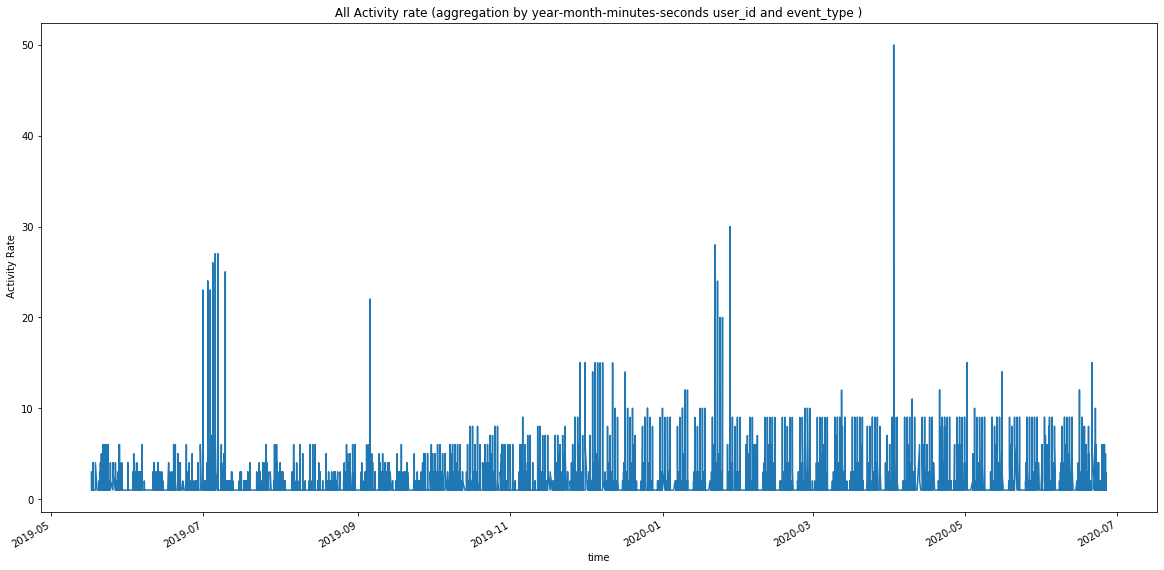

In [24]:

groupped_data.reset_index(drop=False ,inplace= True)
dm = groupped_data.copy()
dm.index = dm.apply(lambda x: dt.datetime(x['year'], x['month'], x['day'], x['hour']), axis=1)
dm.drop(['year', 'month','day','hour'], axis=1, inplace=True)

dm['count'].plot(#kind='line',
             figsize=(20, 10), # pass a tuple (x, y) size
             )

plt.title(' All Activity rate (aggregation by year-month-minutes-seconds user_id and event_type ) ')
plt.ylabel(' Activity Rate')
plt.xlabel('time')

plt.show() 

# User and Clients Activity rate

### 2019 data : aggregation by seconds and clients lists
    the index is built around the unique combinations at a rate of seconds for a given user_id,
    along with his corresponding clients list and event_type

In [25]:
gr19 = df['2019'].groupby(['year','month','day','hour','minutes',\
                           'seconds','user_id','event_type',\
                           'cl_0','cl_1','cl_2','cl_3','cl_4',\
                           'cl_5','cl_6','cl_7','cl_8','cl_9',\
                           'cl_10','cl_11','cl_12','cl_13','cl_14',\
                           'cl_15','cl_16','cl_17','cl_18','cl_19'
                                   ]).agg({'count': 'size'})
#gr19 = df['2019'].groupby(['year','month','day','hour','user_id','cl0','cl1','cl2','cl3','cl4'
                                   #]).agg({'count': 'size'})
print(" Groupped Data for 2019:")
gr19



 Groupped Data for 2019:


count
year month day hour minutes seconds user_id event_type      cl_0  cl_1  cl_2  cl_3  cl_4   cl_5   cl_6    cl_7    cl_8    cl_9    cl_10    cl_11   cl_12   cl_13   cl_14     cl_15    cl_16   cl_17   cl_18   cl_19         
2019 6     6   9    43      21      278583  PROFILE_CREATED 10193 4100  7956  8561  213984 9490   16749.0 21951.0 9005.0  9623.0  221528.0 18318.0 8580.0  16208.0 2397613.0 193448.0 11088.0 8136.0  5238.0  23082.0      1
           24  6    29      17      261470  PROFILE_CREATED 53866 42635 42666 52759 47692  42670  42667.0 42636.0 54200.0 47358.0 51547.0  42640.0 45393.0 42641.0 42675.0   53104.0  47690.0 52439.0 42642.0 47689.0      1
               20   2       12      261470  PROFILE_UPDATED 53866 42635 42666 52759 47692  42670  54200.0 42636.0 42667.0 47358.0 51547.0  45393.0 42640.0 42641.0 42675.0   53104.0  52439.0 47690.0 42642.0 47689.0      1
                    46      40      261470  PROFILE_UPDATED 53866 42635 42666 52759 47692  42670  42667.0 42636.0 54200.0 47358.0 51547.0  42640.0 45393.0 42641.0 42675.0   53104.0  47690.0 52439.0 42642.0 47689.0      1
           25  20   2       9       261470  PROFILE_UPDATED 53866 42635 42666 52759 47692  42670  54200.0 42636.0 42667.0 47358.0 51547.0  45393.0 42640.0 42641.0 42675.0   53104.0  52439.0 47690.0 42642.0 47689.0      1
...                                                                                                                                                                                                                      ...
     12    20  21   49      12      196338  PROFILE_UPDATED 18034 7935  5918  22419 20929  4823.0 22430.0 23612.0 6718.0  8964.0  15779.0  7430.0  13044.0 10969.0 19902.0   13233.0  24320.0 5480.0  14888.0 3139.0       1
                            13      196338  PROFILE_UPDATED 18034 7935  5918  22419 20929  4823.0 22430.0 23612.0 6718.0  8964.0  15779.0  7430.0  13044.0 10969.0 19902.0   13233.0  24320.0 5480.0  14888.0 3139.0       2
                            15      196338  PROFILE_UPDATED 18034 7935  5918  22419 20929  4823.0 22430.0 23612.0 6718.0  8964.0  15779.0  7430.0  13044.0 10969.0 19902.0   13233.0  24320.0 5480.0  14888.0 3139.0       2
                            16      196338  PROFILE_UPDATED 18034 7935  5918  22419 20929  4823.0 22430.0 23612.0 6718.0  8964.0  15779.0  7430.0  13044.0 10969.0 19902.0   13233.0  24320.0 5480.0  14888.0 3139.0       1
                            17      196338  PROFILE_UPDATED 18034 7935  5918  22419 20929  4823.0 22430.0 23612.0 6718.0  8964.0  15779.0  7430.0  13044.0 10969.0 19902.0   13233.0  24320.0 5480.0  14888.0 3139.0       1

[896 rows x 1 columns]

In [26]:
print("")

print('COUNT MAX :')
m = (gr19.max()).iloc[0]
print(m)
print("---------------------------------------------")
upper_limit , anom = find_anomalies(gr19['count'])
print("---------------------------------------------")



COUNT MAX :
27
---------------------------------------------
DATA MEAN :
2.068080357142857
  STD : 
4.169784902893672

 Anomaly_cut_off value (aka std * 3 value) 
12.509354708681016

   LIMIT VALUES  :
upper_limit value
14.577435065823874
lower_limit value
-10.441274351538159
---------------------------------------------


In [27]:
print("")
print(' Events surpassing the threshold limit obtained per (user_id evt_type and clients) \
      per (sec- min-hour-day-month):  ')
gr19[ gr19['count'] > upper_limit ]






 Events surpassing the threshold limit obtained per (user_id evt_type and clients)       per (sec- min-hour-day-month):  


count
year month day hour minutes seconds user_id event_type      cl_0  cl_1 cl_2 cl_3  cl_4   cl_5    cl_6   cl_7    cl_8   cl_9    cl_10   cl_11   cl_12  cl_13   cl_14  cl_15   cl_16   cl_17  cl_18  cl_19        
2019 6     30  20   2       15      196338  PROFILE_UPDATED 24387 5748 7935 15779 3093   18339   7109.0 10400.0 8964.0 12517.0 22383.0 19267.0 5294.0 21733.0 3635.0 13098.0 11823.0 9740.0 7237.0 5480.0     22
                            16      196338  PROFILE_UPDATED 24387 5748 7935 15779 3093   18339   7109.0 10400.0 8964.0 12517.0 22383.0 19267.0 5294.0 21733.0 3635.0 13098.0 11823.0 9740.0 7237.0 5480.0     23
                            17      196338  PROFILE_UPDATED 24387 5748 7935 15779 3093   18339   7109.0 10400.0 8964.0 12517.0 22383.0 19267.0 5294.0 21733.0 3635.0 13098.0 11823.0 9740.0 7237.0 5480.0     22
                            18      196338  PROFILE_UPDATED 24387 5748 7935 15779 3093   18339   7109.0 10400.0 8964.0 12517.0 22383.0 19267.0 5294.0 21733.0 3635.0 13098.0 11823.0 9740.0 7237.0 5480.0     22
                            19      196338  PROFILE_UPDATED 24387 5748 7935 15779 3093   18339   7109.0 10400.0 8964.0 12517.0 22383.0 19267.0 5294.0 21733.0 3635.0 13098.0 11823.0 9740.0 7237.0 5480.0     20
     7     2   20   2       10      196338  PROFILE_UPDATED 24387 5748 7935 15779 3093   18339   7109.0 10400.0 8964.0 12517.0 22383.0 19267.0 5294.0 21733.0 3635.0 13098.0 11823.0 9740.0 7237.0 5480.0     17
                            12      196338  PROFILE_UPDATED 24387 5748 7935 15779 3093   18339   7109.0 10400.0 8964.0 12517.0 22383.0 19267.0 5294.0 21733.0 3635.0 13098.0 11823.0 9740.0 7237.0 5480.0     21
                            13      196338  PROFILE_UPDATED 24387 5748 7935 15779 3093   18339   7109.0 10400.0 8964.0 12517.0 22383.0 19267.0 5294.0 21733.0 3635.0 13098.0 11823.0 9740.0 7237.0 5480.0     24
                            14      196338  PROFILE_UPDATED 24387 5748 7935 15779 3093   18339   7109.0 10400.0 8964.0 12517.0 22383.0 19267.0 5294.0 21733.0 3635.0 13098.0 11823.0 9740.0 7237.0 5480.0     24
           3   20   2       10      196338  PROFILE_UPDATED 24387 5748 7935 15779 3093   18339   7109.0 10400.0 8964.0 12517.0 22383.0 19267.0 5294.0 21733.0 3635.0 13098.0 11823.0 9740.0 7237.0 5480.0     23
                            12      196338  PROFILE_UPDATED 24387 5748 7935 15779 3093   18339   7109.0 10400.0 8964.0 12517.0 22383.0 19267.0 5294.0 21733.0 3635.0 13098.0 11823.0 9740.0 7237.0 5480.0     23
                            14      196338  PROFILE_UPDATED 24387 5748 7935 15779 3093   18339   7109.0 10400.0 8964.0 12517.0 22383.0 19267.0 5294.0 21733.0 3635.0 13098.0 11823.0 9740.0 7237.0 5480.0     18
                            15      196338  PROFILE_UPDATED 24387 5748 7935 15779 3093   18339   7109.0 10400.0 8964.0 12517.0 22383.0 19267.0 5294.0 21733.0 3635.0 13098.0 11823.0 9740.0 7237.0 5480.0     22
           4   20   2       11      196338  PROFILE_UPDATED 24387 5748 7935 15779 3093   18339   7109.0 10400.0 8964.0 12517.0 22383.0 19267.0 5294.0 21733.0 3635.0 13098.0 11823.0 9740.0 7237.0 5480.0     24
                            12      196338  PROFILE_UPDATED 24387 5748 7935 15779 3093   18339   7109.0 10400.0 8964.0 12517.0 22383.0 19267.0 5294.0 21733.0 3635.0 13098.0 11823.0 9740.0 7237.0 5480.0     26
                            13      196338  PROFILE_UPDATED 24387 5748 7935 15779 3093   18339   7109.0 10400.0 8964.0 12517.0 22383.0 19267.0 5294.0 21733.0 3635.0 13098.0 11823.0 9740.0 7237.0 5480.0     24
                            14      196338  PROFILE_UPDATED 24387 5748 7935 15779 3093   18339   7109.0 10400.0 8964.0 12517.0 22383.0 19267.0 5294.0 21733.0 3635.0 13098.0 11823.0 9740.0 7237.0 5480.0     16
           5   20   2       14      196338  PROFILE_UPDATED 24387 5748 7935 15779 3093   18339   7109.0 10400.0 8964.0 12517.0 22383.0 19267.0 5294.0 21733.0 3635.0 13098.0 11823.0 9740.0 7237.0 5480.0     21
                       

In [28]:
gr19.reset_index(drop=False ,inplace= True)
dm = gr19.copy()
dm.index = dm.apply(lambda x: dt.datetime(x['year'] , x['month'], x['day'], x['hour'],\
                                          x['minutes'],x['seconds']), axis=1)

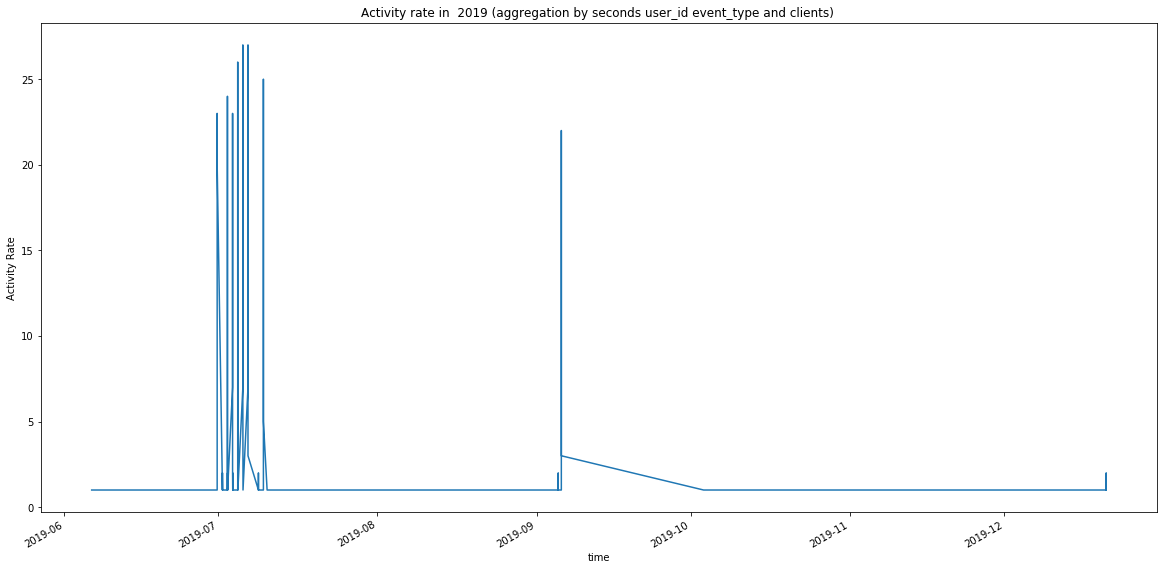

In [29]:

dm['count'].plot(#kind='line',
             figsize=(20, 10), # pass a tuple (x, y) size
             )

plt.title('Activity rate in  2019 (aggregation by seconds user_id event_type and clients) ')
plt.ylabel('Activity Rate')
plt.xlabel('time')

plt.show() 

In [30]:
dm.drop(['year', 'month','day','hour','minutes','seconds'], axis=1, inplace=True)


#saving results to csv file under the results_data directory
#file_csv = "2019_saas_V2.csv"

#csp = str(Path(results_data_dir))
#out_path = csp + "/" + file_csv

#dm.to_csv(out_path ,sep=',', header=True ,index=True ,index_label='timestamp')


### 2020 data

In [31]:
gr20 = df['2020'].groupby(['year','month','day','hour','minutes',\
                           'seconds','user_id','event_type',\
                           'cl_0','cl_1','cl_2','cl_3','cl_4',\
                           'cl_5','cl_6','cl_7','cl_8','cl_9',\
                           'cl_10','cl_11','cl_12','cl_13','cl_14',\
                           'cl_15','cl_16','cl_17','cl_18','cl_19'
                                   ]).agg({'count': 'size'}) 

print(" Groupped Data for 2020 ")
print(gr20)

print("")
print('COUNT MAX :')
m = (gr20.max()).iloc[0]
print(m)
print("---------------------------------------------")
upper_limit , anom = find_anomalies(gr20['count'])
print("---------------------------------------------")

print("")
print(' Events outside of the upper limit per user_id+clients per min-hour-day-month:  ')
gr20[ gr20['count'] > upper_limit ]



 Groupped Data for 2020 
                                                                                                                                                                                                                    count
year month day hour minutes seconds user_id event_type      cl_0  cl_1  cl_2    cl_3  cl_4  cl_5   cl_6    cl_7    cl_8    cl_9    cl_10   cl_11   cl_12   cl_13   cl_14   cl_15   cl_16   cl_17   cl_18   cl_19         
2020 3     2   21   48      21      196338  PROFILE_UPDATED 18034 7935  5918    22419 20929 4823.0 22430.0 23612.0 6718.0  8964.0  15779.0 7430.0  13044.0 10969.0 19902.0 13233.0 24320.0 5480.0  14888.0 3139.0       1
                            22      196338  PROFILE_UPDATED 18034 7935  5918    22419 20929 4823.0 22430.0 23612.0 6718.0  8964.0  15779.0 7430.0  13044.0 10969.0 19902.0 13233.0 24320.0 5480.0  14888.0 3139.0       2
                            23      196338  PROFILE_UPDATED 18034 7935  5918    22419 20929 4823.0 2243

count
year month day hour minutes seconds user_id event_type      cl_0  cl_1  cl_2    cl_3    cl_4    cl_5    cl_6    cl_7    cl_8    cl_9    cl_10   cl_11   cl_12   cl_13   cl_14   cl_15   cl_16   cl_17   cl_18   cl_19         
2020 6     20  20   2       52      261470  PROFILE_UPDATED 42640 53866 52439   47689.0 47692.0 47690.0 42635.0 54200.0 42675.0 51547.0 52759.0 42666.0 42670.0 45393.0 42636.0 42667.0 53104.0 42641.0 42642.0 47358.0      5
                            54      261470  PROFILE_UPDATED 42640 53866 52439   47689.0 47692.0 47690.0 42635.0 54200.0 42675.0 51547.0 52759.0 42666.0 42670.0 45393.0 42636.0 42667.0 53104.0 42641.0 42642.0 47358.0      5
                            56      261470  PROFILE_UPDATED 42640 53866 52439   47689.0 47692.0 47690.0 42635.0 54200.0 42675.0 51547.0 52759.0 42666.0 42670.0 45393.0 42636.0 42667.0 53104.0 42641.0 42642.0 47358.0      5
                            57      261470  PROFILE_UPDATED 42640 53866 52439   47689.0 47692.0 47690.0 42635.0 54200.0 42675.0 51547.0 52759.0 42666.0 42670.0 45393.0 42636.0 42667.0 53104.0 42641.0 42642.0 47358.0      6
                            58      261470  PROFILE_UPDATED 42640 53866 52439   47689.0 47692.0 47690.0 42635.0 54200.0 42675.0 51547.0 52759.0 42666.0 42670.0 45393.0 42636.0 42667.0 53104.0 42641.0 42642.0 47358.0      6
                            59      261470  PROFILE_UPDATED 42640 53866 52439   47689.0 47692.0 47690.0 42635.0 54200.0 42675.0 51547.0 52759.0 42666.0 42670.0 45393.0 42636.0 42667.0 53104.0 42641.0 42642.0 47358.0     10
                    3       1       261470  PROFILE_UPDATED 42640 53866 52439.0 47689   47692   47690   42635.0 54200.0 42675.0 51547.0 52759.0 42666.0 42670.0 45393.0 42636.0 42667.0 53104.0 42641.0 42642.0 47358.0      6
                            2       261470  PROFILE_UPDATED 42640 53866 52439.0 47689   47692   47690   42635.0 54200.0 42675.0 51547.0 52759.0 42666.0 42670.0 45393.0 42636.0 42667.0 53104.0 42641.0 42642.0 47358.0     12
                            3       261470  PROFILE_UPDATED 42640 53866 52439.0 47689   47692   47690   42635.0 54200.0 42675.0 51547.0 52759.0 42666.0 42670.0 45393.0 42636.0 42667.0 53104.0 42641.0 42642.0 47358.0      6
                            5       261470  PROFILE_UPDATED 42640 53866 52439.0 47689   47692   47690   42635.0 54200.0 42675.0 51547.0 52759.0 42666.0 42670.0 45393.0 42636.0 42667.0 53104.0 42641.0 42642.0 47358.0     12
                            7       261470  PROFILE_UPDATED 42640 53866 52439.0 47689   47692   47690   42635.0 54200.0 42675.0 51547.0 52759.0 42666.0 42670.0 45393.0 42636.0 42667.0 53104.0 42641.0 42642.0 47358.0      6
                            8       261470  PROFILE_UPDATED 42640 53866 52439.0 47689   47692   47690   42635.0 54200.0 42675.0 51547.0 52759.0 42666.0 42670.0 45393.0 42636.0 42667.0 53104.0 42641.0 42642.0 47358.0      8
                            10      261470  PROFILE_UPDATED 42640 53866 52439.0 47689   47692   47690   42635.0 54200.0 42675.0 51547.0 52759.0 42666.0 42670.0 45393.0 42636.0 42667.0 53104.0 42641.0 42642.0 47358.0      6
                            11      261470  PROFILE_UPDATED 42640 53866 52439.0 47689   47692   47690   42635.0 54200.0 42675.0 51547.0 52759.0 42666.0 42670.0 45393.0 42636.0 42667.0 53104.0 42641.0 42642.0 47358.0      6
                            14      261470  PROFILE_UPDATED 42640 53866 52439.0 47689   47692   47690   42635.0 54200.0 42675.0 51547.0 52759.0 42666.0 42670.0 45393.0 42636.0 42667.0 53104.0 42641.0 42642.0 47358.0      6

In [32]:

gr20.reset_index(drop=False ,inplace= True)
dm = gr20.copy()
dm.index = dm.apply(lambda x: dt.datetime(x['year'] , x['month'], x['day'], \
                                          x['hour'],x['minutes'],x['seconds']), axis=1)


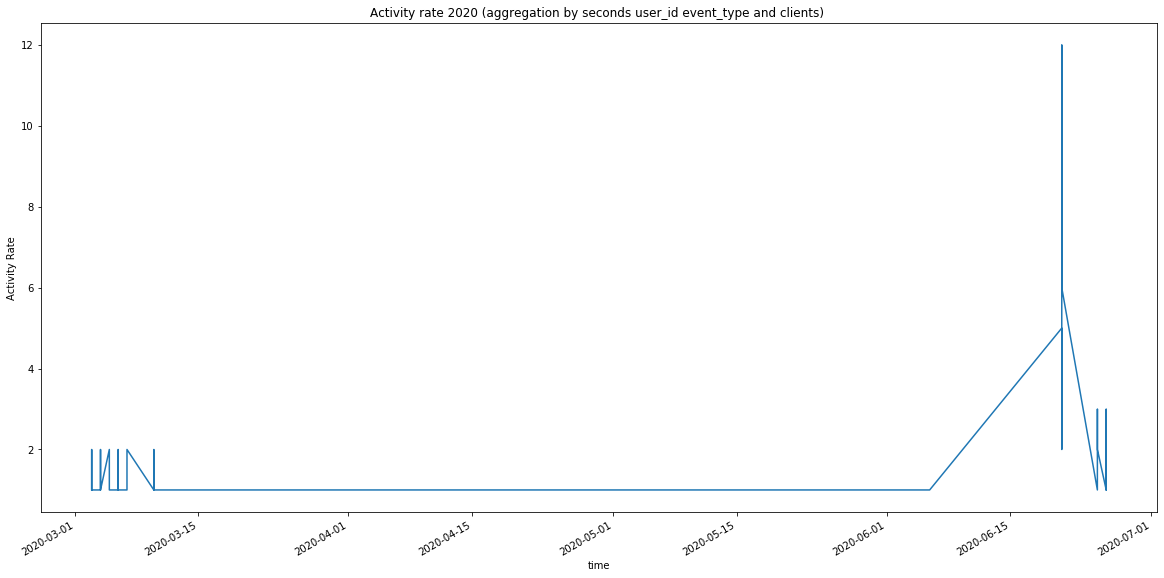

In [33]:
### Visualization within a specific Timespan in 2020
#dm2 = dm.loc['2020-05-01':'2020-05-31']
dm['count'].plot(#kind='line',
             figsize=(20, 10), # pass a tuple (x, y) size
             )

plt.title('Activity rate 2020 (aggregation by seconds user_id event_type and clients) ')
plt.ylabel('Activity Rate')
plt.xlabel('time')

plt.show() 

In [34]:
dm.drop(['year', 'month','day','hour','minutes','seconds'], axis=1, inplace=True)

#saving results to csv file under the results_data directory
#file_csv = "2020_saasV2.csv"

#csp = str(Path(results_data_dir))
#out_path = csp + "/" + file_csv

#dm.to_csv(out_path ,sep=',', header=True ,index=True ,index_label='timestamp')

### All saas data by Minutes

In [35]:
gr = df.groupby(['year','month','day','hour','minutes',\
                           'seconds','user_id','event_type',\
                           'cl_0','cl_1','cl_2','cl_3','cl_4',\
                           'cl_5','cl_6','cl_7','cl_8','cl_9',\
                           'cl_10','cl_11','cl_12','cl_13','cl_14',\
                           'cl_15','cl_16','cl_17','cl_18','cl_19'
                                   ]).agg({'count': 'size'})

print(" Groupped Data 2019 and 2019")
gr


 Groupped Data 2019 and 2019


count
year month day hour minutes seconds user_id event_type      cl_0  cl_1  cl_2    cl_3  cl_4   cl_5  cl_6    cl_7    cl_8    cl_9    cl_10    cl_11   cl_12   cl_13   cl_14     cl_15    cl_16   cl_17   cl_18   cl_19         
2019 6     6   9    43      21      278583  PROFILE_CREATED 10193 4100  7956    8561  213984 9490  16749.0 21951.0 9005.0  9623.0  221528.0 18318.0 8580.0  16208.0 2397613.0 193448.0 11088.0 8136.0  5238.0  23082.0      1
           24  6    29      17      261470  PROFILE_CREATED 53866 42635 42666   52759 47692  42670 42667.0 42636.0 54200.0 47358.0 51547.0  42640.0 45393.0 42641.0 42675.0   53104.0  47690.0 52439.0 42642.0 47689.0      1
               20   2       12      261470  PROFILE_UPDATED 53866 42635 42666   52759 47692  42670 54200.0 42636.0 42667.0 47358.0 51547.0  45393.0 42640.0 42641.0 42675.0   53104.0  52439.0 47690.0 42642.0 47689.0      1
                    46      40      261470  PROFILE_UPDATED 53866 42635 42666   52759 47692  42670 42667.0 42636.0 54200.0 47358.0 51547.0  42640.0 45393.0 42641.0 42675.0   53104.0  47690.0 52439.0 42642.0 47689.0      1
           25  20   2       9       261470  PROFILE_UPDATED 53866 42635 42666   52759 47692  42670 54200.0 42636.0 42667.0 47358.0 51547.0  45393.0 42640.0 42641.0 42675.0   53104.0  52439.0 47690.0 42642.0 47689.0      1
...                                                                                                                                                                                                                       ...
2020 6     25  20   56      51      261470  PROFILE_UPDATED 42642 52759 47692.0 53866 42640  47689 42666.0 47690.0 54200.0 42635.0 42675.0  42670.0 51547.0 47358.0 53104.0   42636.0  42667.0 42641.0 45393.0 52439.0      3
                            52      261470  PROFILE_UPDATED 42642 52759 47692.0 53866 42640  47689 42666.0 47690.0 54200.0 42635.0 42675.0  42670.0 51547.0 47358.0 53104.0   42636.0  42667.0 42641.0 45393.0 52439.0      2
                            53      261470  PROFILE_UPDATED 42642 52759 47692.0 53866 42640  47689 42666.0 47690.0 54200.0 42635.0 42675.0  42670.0 51547.0 47358.0 53104.0   42636.0  42667.0 42641.0 45393.0 52439.0      2
                            54      261470  PROFILE_UPDATED 42642 52759 47692.0 53866 42640  47689 42666.0 47690.0 54200.0 42635.0 42675.0  42670.0 51547.0 47358.0 53104.0   42636.0  42667.0 42641.0 45393.0 52439.0      3
                            55      261470  PROFILE_UPDATED 42642 52759 47692.0 53866 42640  47689 42666.0 47690.0 54200.0 42635.0 42675.0  42670.0 51547.0 47358.0 53104.0   42636.0  42667.0 42641.0 45393.0 52439.0      1

[1904 rows x 1 columns]

In [36]:
print("")
print('COUNT MAX :')
m = (gr.max()).iloc[0]
print(m)

print("")
print("Maximum Activity details: ")
max_act = groupped_data[groupped_data["count"]== m]
print(max_act)

print("")
print("user_id with maximum activity count ")
max_act.reset_index(drop=False, inplace=True)
user_id = max_act['user_id']
print(user_id)

print("---------------------------------------------")
upper_limit , anom = find_anomalies(gr['count'])
print("---------------------------------------------")

print("")
print(' Events outside of the upper limit per user_id+clients per min-hour-day-month:  ')
evt_anom = gr[ gr['count'] > upper_limit ]
evt_anom 


COUNT MAX :
27

Maximum Activity details: 
      year  month  day  hour  minutes  seconds  user_id       event_type  \
9793  2019      7    5    20        2       16   196338  PROFILE_UPDATED   
9911  2019      7    6    20        2       12   196338  PROFILE_UPDATED   

      count  
9793     27  
9911     27  

user_id with maximum activity count 
0    196338
1    196338
Name: user_id, dtype: int64
---------------------------------------------
DATA MEAN :
1.986344537815126
  STD : 
2.9255148363602306

 Anomaly_cut_off value (aka std * 3 value) 
8.776544509080692

   LIMIT VALUES  :
upper_limit value
10.762889046895818
lower_limit value
-6.790199971265565
---------------------------------------------

 Events outside of the upper limit per user_id+clients per min-hour-day-month:  


count
year month day hour minutes seconds user_id event_type      cl_0  cl_1  cl_2    cl_3  cl_4   cl_5    cl_6    cl_7    cl_8    cl_9    cl_10   cl_11   cl_12   cl_13   cl_14   cl_15   cl_16   cl_17   cl_18   cl_19         
2019 6     30  20   2       15      196338  PROFILE_UPDATED 24387 5748  7935    15779 3093   18339   7109.0  10400.0 8964.0  12517.0 22383.0 19267.0 5294.0  21733.0 3635.0  13098.0 11823.0 9740.0  7237.0  5480.0      22
                            16      196338  PROFILE_UPDATED 24387 5748  7935    15779 3093   18339   7109.0  10400.0 8964.0  12517.0 22383.0 19267.0 5294.0  21733.0 3635.0  13098.0 11823.0 9740.0  7237.0  5480.0      23
                            17      196338  PROFILE_UPDATED 24387 5748  7935    15779 3093   18339   7109.0  10400.0 8964.0  12517.0 22383.0 19267.0 5294.0  21733.0 3635.0  13098.0 11823.0 9740.0  7237.0  5480.0      22
                            18      196338  PROFILE_UPDATED 24387 5748  7935    15779 3093   18339   7109.0  10400.0 8964.0  12517.0 22383.0 19267.0 5294.0  21733.0 3635.0  13098.0 11823.0 9740.0  7237.0  5480.0      22
                            19      196338  PROFILE_UPDATED 24387 5748  7935    15779 3093   18339   7109.0  10400.0 8964.0  12517.0 22383.0 19267.0 5294.0  21733.0 3635.0  13098.0 11823.0 9740.0  7237.0  5480.0      20
     7     2   20   2       10      196338  PROFILE_UPDATED 24387 5748  7935    15779 3093   18339   7109.0  10400.0 8964.0  12517.0 22383.0 19267.0 5294.0  21733.0 3635.0  13098.0 11823.0 9740.0  7237.0  5480.0      17
                            11      196338  PROFILE_UPDATED 24387 5748  7935    15779 3093   18339   7109.0  10400.0 8964.0  12517.0 22383.0 19267.0 5294.0  21733.0 3635.0  13098.0 11823.0 9740.0  7237.0  5480.0      11
                            12      196338  PROFILE_UPDATED 24387 5748  7935    15779 3093   18339   7109.0  10400.0 8964.0  12517.0 22383.0 19267.0 5294.0  21733.0 3635.0  13098.0 11823.0 9740.0  7237.0  5480.0      21
                            13      196338  PROFILE_UPDATED 24387 5748  7935    15779 3093   18339   7109.0  10400.0 8964.0  12517.0 22383.0 19267.0 5294.0  21733.0 3635.0  13098.0 11823.0 9740.0  7237.0  5480.0      24
                            14      196338  PROFILE_UPDATED 24387 5748  7935    15779 3093   18339   7109.0  10400.0 8964.0  12517.0 22383.0 19267.0 5294.0  21733.0 3635.0  13098.0 11823.0 9740.0  7237.0  5480.0      24
                            15      196338  PROFILE_UPDATED 24387 5748  7935    15779 3093   18339   7109.0  10400.0 8964.0  12517.0 22383.0 19267.0 5294.0  21733.0 3635.0  13098.0 11823.0 9740.0  7237.0  5480.0      14
           3   20   2       10      196338  PROFILE_UPDATED 24387 5748  7935    15779 3093   18339   7109.0  10400.0 8964.0  12517.0 22383.0 19267.0 5294.0  21733.0 3635.0  13098.0 11823.0 9740.0  7237.0  5480.0      23
                            12      196338  PROFILE_UPDATED 24387 5748  7935    15779 3093   18339   7109.0  10400.0 8964.0  12517.0 22383.0 19267.0 5294.0  21733.0 3635.0  13098.0 11823.0 9740.0  7237.0  5480.0      23
                            14      196338  PROFILE_UPDATED 24387 5748  7935    15779 3093   18339   7109.0  10400.0 8964.0  12517.0 22383.0 19267.0 5294.0  21733.0 3635.0  13098.0 11823.0 9740.0  7237.0  5480.0      18
                            15      196338  PROFILE_UPDATED 24387 5748  7935    15779 3093   18339   7109.0  10400.0 8964.0  12517.0 22383.0 19267.0 5294.0  21733.0 3635.0  13098.0 11823.0 9740.0  7237.0  5480.0      22
           4   20   2       9       196338  PROFILE_UPDATED 24387 5748  7935    15779 3093   18339   7109.0  10400.0 8964.0  12517.0 22383.0 19267.0 5294.0  21733.0 3635.0  13098.0 11823.0 9740.0  7237.0  5480.0      14
                            11      196338  PROFILE_UPDATED 24387 5748  7935    15779 3093   18339   7109.0  10400.0 8964.0  12517.0 22383.0 19267.0 5294.0  21733.0 3635.0  13098.0 11823.0 9740.0  7237.0  5480.0      24
                            12    

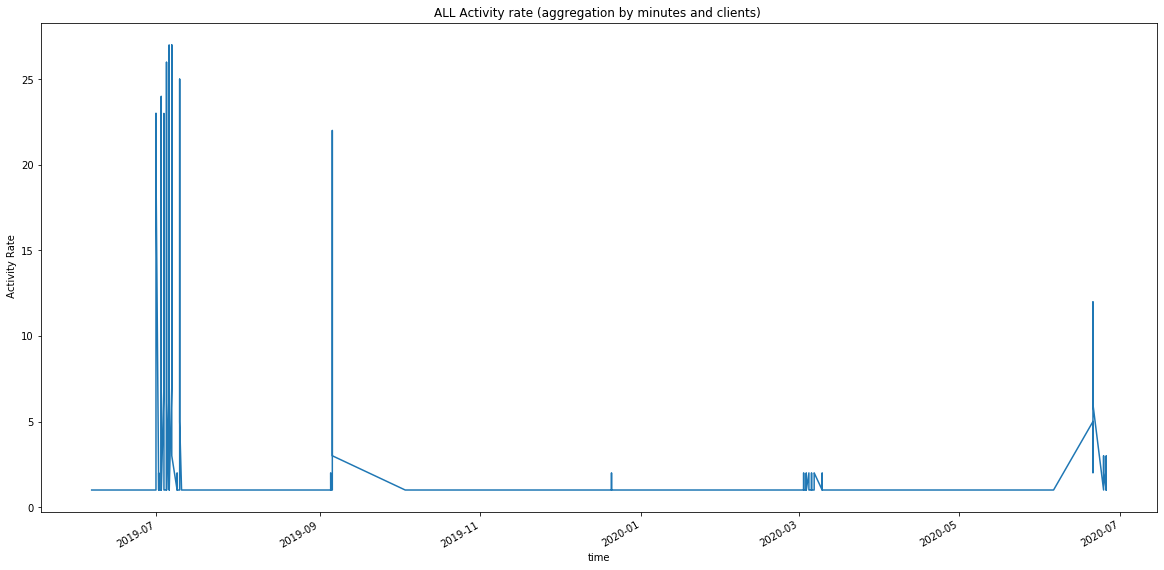

In [37]:
#redifing the dataframe index
gr.reset_index(drop=False ,inplace= True)
dm = gr.copy()
dm.index = dm.apply(lambda x: dt.datetime(x['year'] , x['month'], x['day'],\
                                          x['hour'],x['minutes']), axis=1)


#plotting the count graphic/ figure 
dm['count'].plot(#kind='line',
             figsize=(20, 10), # pass a tuple (x, y) size
             )

plt.title('ALL Activity rate (aggregation by minutes and clients) ')
plt.ylabel(' Activity Rate')
plt.xlabel('time')

plt.show() 

In [38]:
dm.drop(['year', 'month','day','hour' ,'minutes'], axis=1, inplace=True)
dm.head()

#saving results to csv file under the results_data directory
file_csv = "saas_min_v2.csv"

csp = str(Path(results_data_dir))
out_path = csp + "/" + file_csv

dm.to_csv(out_path ,sep=',', header=True ,index=True ,index_label='timestamp')

## All activity by seconds

In [39]:
gr = df.groupby(['year','month','day','hour','minutes',\
                           'seconds','user_id','event_type',\
                           'cl_0','cl_1','cl_2','cl_3','cl_4',\
                           'cl_5','cl_6','cl_7','cl_8','cl_9',\
                           'cl_10','cl_11','cl_12','cl_13','cl_14',\
                           'cl_15','cl_16','cl_17','cl_18','cl_19'
                                   ]).agg({'count': 'size'})
print(" clients and users Groupped Data")
gr


 clients and users Groupped Data


count
year month day hour minutes seconds user_id event_type      cl_0  cl_1  cl_2    cl_3  cl_4   cl_5  cl_6    cl_7    cl_8    cl_9    cl_10    cl_11   cl_12   cl_13   cl_14     cl_15    cl_16   cl_17   cl_18   cl_19         
2019 6     6   9    43      21      278583  PROFILE_CREATED 10193 4100  7956    8561  213984 9490  16749.0 21951.0 9005.0  9623.0  221528.0 18318.0 8580.0  16208.0 2397613.0 193448.0 11088.0 8136.0  5238.0  23082.0      1
           24  6    29      17      261470  PROFILE_CREATED 53866 42635 42666   52759 47692  42670 42667.0 42636.0 54200.0 47358.0 51547.0  42640.0 45393.0 42641.0 42675.0   53104.0  47690.0 52439.0 42642.0 47689.0      1
               20   2       12      261470  PROFILE_UPDATED 53866 42635 42666   52759 47692  42670 54200.0 42636.0 42667.0 47358.0 51547.0  45393.0 42640.0 42641.0 42675.0   53104.0  52439.0 47690.0 42642.0 47689.0      1
                    46      40      261470  PROFILE_UPDATED 53866 42635 42666   52759 47692  42670 42667.0 42636.0 54200.0 47358.0 51547.0  42640.0 45393.0 42641.0 42675.0   53104.0  47690.0 52439.0 42642.0 47689.0      1
           25  20   2       9       261470  PROFILE_UPDATED 53866 42635 42666   52759 47692  42670 54200.0 42636.0 42667.0 47358.0 51547.0  45393.0 42640.0 42641.0 42675.0   53104.0  52439.0 47690.0 42642.0 47689.0      1
...                                                                                                                                                                                                                       ...
2020 6     25  20   56      51      261470  PROFILE_UPDATED 42642 52759 47692.0 53866 42640  47689 42666.0 47690.0 54200.0 42635.0 42675.0  42670.0 51547.0 47358.0 53104.0   42636.0  42667.0 42641.0 45393.0 52439.0      3
                            52      261470  PROFILE_UPDATED 42642 52759 47692.0 53866 42640  47689 42666.0 47690.0 54200.0 42635.0 42675.0  42670.0 51547.0 47358.0 53104.0   42636.0  42667.0 42641.0 45393.0 52439.0      2
                            53      261470  PROFILE_UPDATED 42642 52759 47692.0 53866 42640  47689 42666.0 47690.0 54200.0 42635.0 42675.0  42670.0 51547.0 47358.0 53104.0   42636.0  42667.0 42641.0 45393.0 52439.0      2
                            54      261470  PROFILE_UPDATED 42642 52759 47692.0 53866 42640  47689 42666.0 47690.0 54200.0 42635.0 42675.0  42670.0 51547.0 47358.0 53104.0   42636.0  42667.0 42641.0 45393.0 52439.0      3
                            55      261470  PROFILE_UPDATED 42642 52759 47692.0 53866 42640  47689 42666.0 47690.0 54200.0 42635.0 42675.0  42670.0 51547.0 47358.0 53104.0   42636.0  42667.0 42641.0 45393.0 52439.0      1

[1904 rows x 1 columns]

In [40]:

print("")
print('COUNT MAX :')
m = (gr.max()).iloc[0]
m



COUNT MAX :


27

In [41]:
print("")
print("Maximum Activity details: ")
max_act = groupped_data[groupped_data["count"]== m]
print(max_act)

print("")
print("user_id with maximum activity count ")
max_act.reset_index(drop=False, inplace=True)
user_id = max_act['user_id']
print(user_id)



Maximum Activity details: 
      year  month  day  hour  minutes  seconds  user_id       event_type  \
9793  2019      7    5    20        2       16   196338  PROFILE_UPDATED   
9911  2019      7    6    20        2       12   196338  PROFILE_UPDATED   

      count  
9793     27  
9911     27  

user_id with maximum activity count 
0    196338
1    196338
Name: user_id, dtype: int64


In [42]:
print("---------------------------------------------")
upper_limit , anom = find_anomalies(gr['count'])
print("---------------------------------------------")

print("")
print(' Events outside of the upper limit per user_id+clients per seconds-min-hour-day-month:  ')
evt_anom = gr[ gr['count'] > upper_limit ]
evt_anom

---------------------------------------------
DATA MEAN :
1.986344537815126
  STD : 
2.9255148363602306

 Anomaly_cut_off value (aka std * 3 value) 
8.776544509080692

   LIMIT VALUES  :
upper_limit value
10.762889046895818
lower_limit value
-6.790199971265565
---------------------------------------------

 Events outside of the upper limit per user_id+clients per seconds-min-hour-day-month:  


count
year month day hour minutes seconds user_id event_type      cl_0  cl_1  cl_2    cl_3  cl_4   cl_5    cl_6    cl_7    cl_8    cl_9    cl_10   cl_11   cl_12   cl_13   cl_14   cl_15   cl_16   cl_17   cl_18   cl_19         
2019 6     30  20   2       15      196338  PROFILE_UPDATED 24387 5748  7935    15779 3093   18339   7109.0  10400.0 8964.0  12517.0 22383.0 19267.0 5294.0  21733.0 3635.0  13098.0 11823.0 9740.0  7237.0  5480.0      22
                            16      196338  PROFILE_UPDATED 24387 5748  7935    15779 3093   18339   7109.0  10400.0 8964.0  12517.0 22383.0 19267.0 5294.0  21733.0 3635.0  13098.0 11823.0 9740.0  7237.0  5480.0      23
                            17      196338  PROFILE_UPDATED 24387 5748  7935    15779 3093   18339   7109.0  10400.0 8964.0  12517.0 22383.0 19267.0 5294.0  21733.0 3635.0  13098.0 11823.0 9740.0  7237.0  5480.0      22
                            18      196338  PROFILE_UPDATED 24387 5748  7935    15779 3093   18339   7109.0  10400.0 8964.0  12517.0 22383.0 19267.0 5294.0  21733.0 3635.0  13098.0 11823.0 9740.0  7237.0  5480.0      22
                            19      196338  PROFILE_UPDATED 24387 5748  7935    15779 3093   18339   7109.0  10400.0 8964.0  12517.0 22383.0 19267.0 5294.0  21733.0 3635.0  13098.0 11823.0 9740.0  7237.0  5480.0      20
     7     2   20   2       10      196338  PROFILE_UPDATED 24387 5748  7935    15779 3093   18339   7109.0  10400.0 8964.0  12517.0 22383.0 19267.0 5294.0  21733.0 3635.0  13098.0 11823.0 9740.0  7237.0  5480.0      17
                            11      196338  PROFILE_UPDATED 24387 5748  7935    15779 3093   18339   7109.0  10400.0 8964.0  12517.0 22383.0 19267.0 5294.0  21733.0 3635.0  13098.0 11823.0 9740.0  7237.0  5480.0      11
                            12      196338  PROFILE_UPDATED 24387 5748  7935    15779 3093   18339   7109.0  10400.0 8964.0  12517.0 22383.0 19267.0 5294.0  21733.0 3635.0  13098.0 11823.0 9740.0  7237.0  5480.0      21
                            13      196338  PROFILE_UPDATED 24387 5748  7935    15779 3093   18339   7109.0  10400.0 8964.0  12517.0 22383.0 19267.0 5294.0  21733.0 3635.0  13098.0 11823.0 9740.0  7237.0  5480.0      24
                            14      196338  PROFILE_UPDATED 24387 5748  7935    15779 3093   18339   7109.0  10400.0 8964.0  12517.0 22383.0 19267.0 5294.0  21733.0 3635.0  13098.0 11823.0 9740.0  7237.0  5480.0      24
                            15      196338  PROFILE_UPDATED 24387 5748  7935    15779 3093   18339   7109.0  10400.0 8964.0  12517.0 22383.0 19267.0 5294.0  21733.0 3635.0  13098.0 11823.0 9740.0  7237.0  5480.0      14
           3   20   2       10      196338  PROFILE_UPDATED 24387 5748  7935    15779 3093   18339   7109.0  10400.0 8964.0  12517.0 22383.0 19267.0 5294.0  21733.0 3635.0  13098.0 11823.0 9740.0  7237.0  5480.0      23
                            12      196338  PROFILE_UPDATED 24387 5748  7935    15779 3093   18339   7109.0  10400.0 8964.0  12517.0 22383.0 19267.0 5294.0  21733.0 3635.0  13098.0 11823.0 9740.0  7237.0  5480.0      23
                            14      196338  PROFILE_UPDATED 24387 5748  7935    15779 3093   18339   7109.0  10400.0 8964.0  12517.0 22383.0 19267.0 5294.0  21733.0 3635.0  13098.0 11823.0 9740.0  7237.0  5480.0      18
                            15      196338  PROFILE_UPDATED 24387 5748  7935    15779 3093   18339   7109.0  10400.0 8964.0  12517.0 22383.0 19267.0 5294.0  21733.0 3635.0  13098.0 11823.0 9740.0  7237.0  5480.0      22
           4   20   2       9       196338  PROFILE_UPDATED 24387 5748  7935    15779 3093   18339   7109.0  10400.0 8964.0  12517.0 22383.0 19267.0 5294.0  21733.0 3635.0  13098.0 11823.0 9740.0  7237.0  5480.0      14
                            11      196338  PROFILE_UPDATED 24387 5748  7935    15779 3093   18339   7109.0  10400.0 8964.0  12517.0 22383.0 19267.0 5294.0  21733.0 3635.0  13098.0 11823.0 9740.0  7237.0  5480.0      24
                            12    

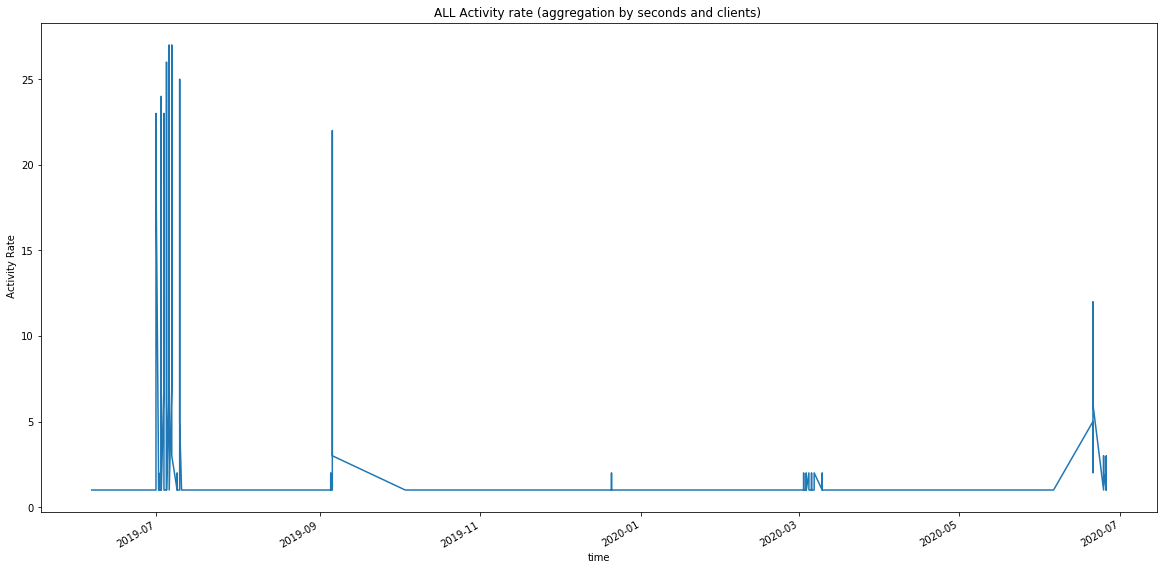

In [43]:
#redifing the dataframe index
gr.reset_index(drop=False ,inplace= True)
dm = gr.copy()
dm.index = dm.apply(lambda x: dt.datetime(x['year'] , x['month'], x['day'], \
                                          x['hour'],x['minutes'],x['seconds']), axis=1)


#plotting the count graphic/ figure 
dm['count'].plot(#kind='line',
             figsize=(20, 10), # pass a tuple (x, y) size
             )

plt.title('ALL Activity rate (aggregation by seconds and clients) ')
plt.ylabel(' Activity Rate')
plt.xlabel('time')

plt.show() 

In [44]:
dm.drop(['year','month','day','hour' ,'minutes','seconds'], axis=1, inplace=True)
dm.head()

#saving results to csv file under the results_data directory
file_csv = "saas_sec_v2.csv"

csp = str(Path(results_data_dir))
out_path = csp + "/" + file_csv

dm.to_csv(out_path ,sep=',', header=True ,index=True ,index_label='timestamp')

### Visualization of activity rate within a specific timespan

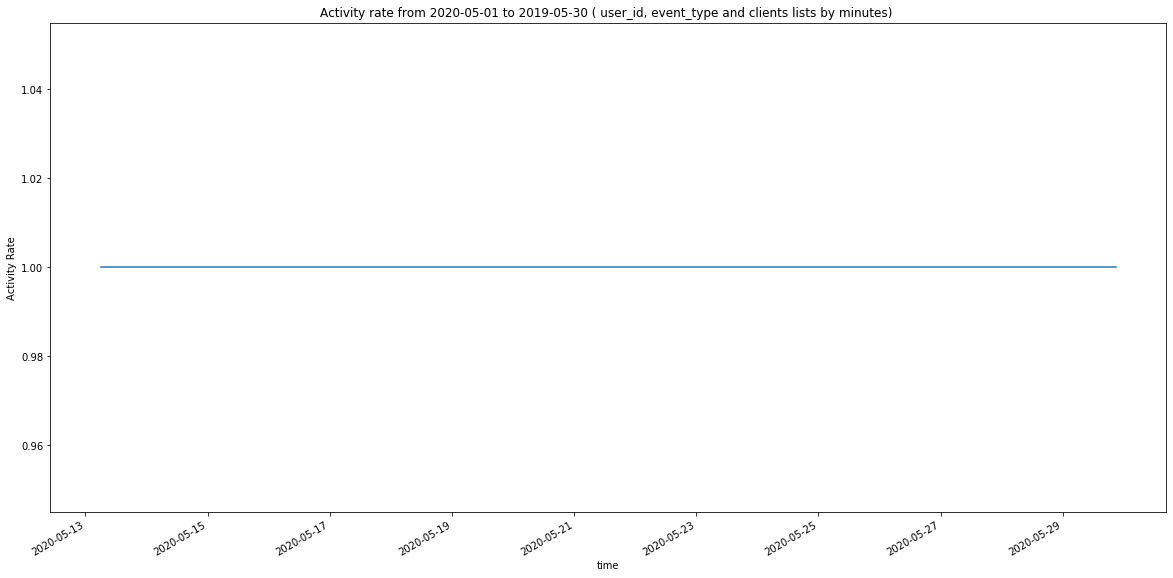

In [45]:
dm2 = dm.loc['2020-05-01':'2020-05-30']
dm2['count'].plot(#kind='line',
             figsize=(20, 10), # pass a tuple (x, y) size
             )

plt.title('Activity rate from 2020-05-01 to 2019-05-30 ( user_id, event_type and clients lists by minutes) ')
plt.ylabel('Activity Rate')
plt.xlabel('time')

plt.show() 

#pas d'activité en mai ??!